# EDA

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.decomposition import PCA
import skfuzzy as fuzz
# import cmeans

In [32]:
# Load datasets
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to identify wine type
red_wine['wine_type'] = 0
white_wine['wine_type'] = 1

print('Red wine shape', red_wine.shape)
print('White wine shape', white_wine.shape)

Red wine shape (1599, 13)
White wine shape (4898, 13)


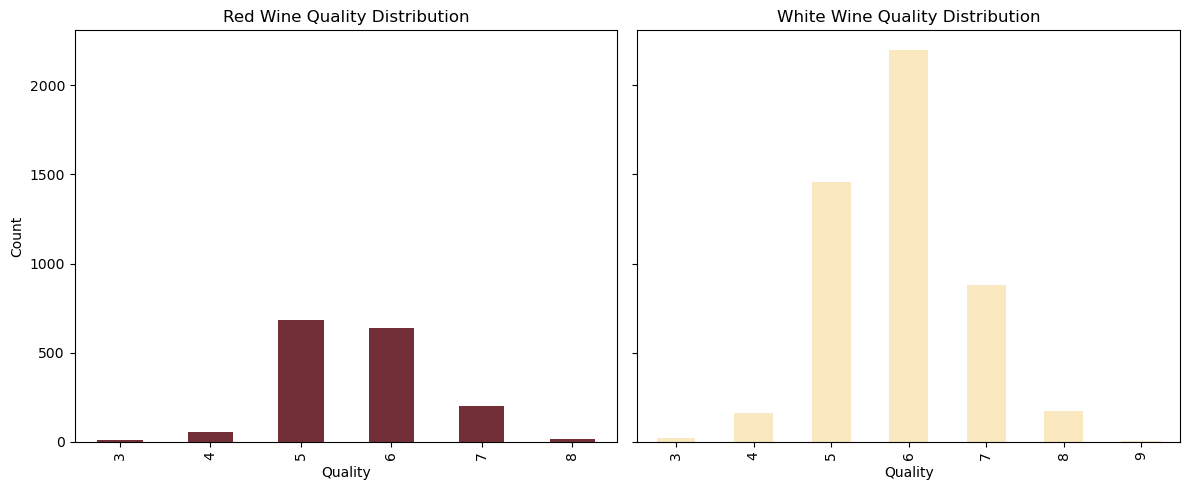

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

red_wine['quality'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='#722F37')
axes[0].set_title('Red Wine Quality Distribution')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Count')

white_wine['quality'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='#f9e8c0')
axes[1].set_title('White Wine Quality Distribution')
axes[1].set_xlabel('Quality')

plt.tight_layout()
plt.show()

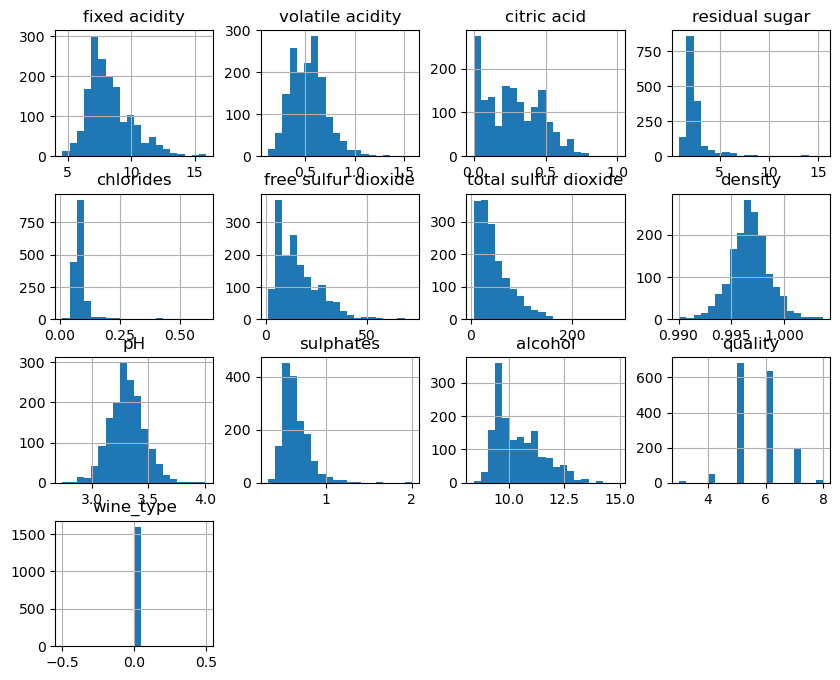

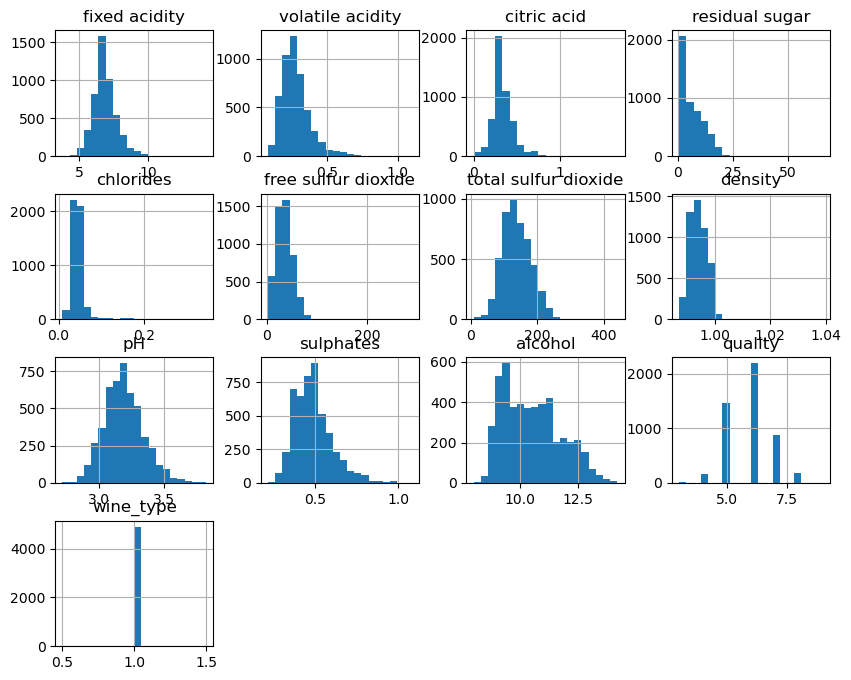

In [17]:
# CHANGE DISPLAY TO UNDERSTAND DIFFERENCES BETTER (like above)

red_wine.hist(figsize=(10,8), bins=20)
plt.show()

white_wine.hist(figsize=(10,8), bins=20)

plt.show()

In [18]:
# Combine datasets
data = pd.concat([red_wine, white_wine])

data.head(-1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,1
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1


In [19]:
print('Dataset shape:', data.shape)
print('Dataset has', data.shape[0],'data points and', data.shape[1], 'features.')
print("Dataset number of array dimensions: ", data.ndim)
print("Dataset number of elements: ", data.size)

Dataset shape: (6497, 13)
Dataset has 6497 data points and 13 features.
Dataset number of array dimensions:  2
Dataset number of elements:  84461


In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [21]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

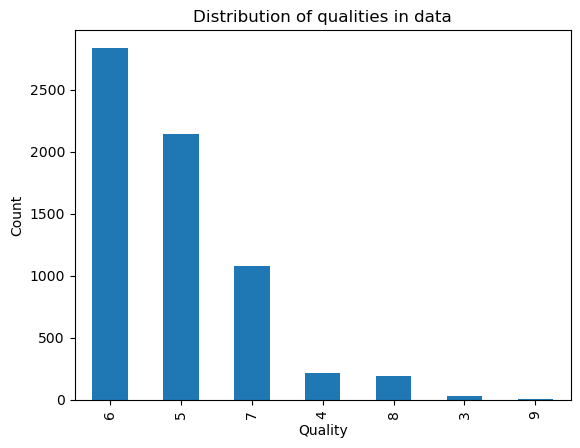

In [22]:
data['quality'].value_counts().plot(kind='bar')

# Adding titles and labels
plt.title('Distribution of qualities in data')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

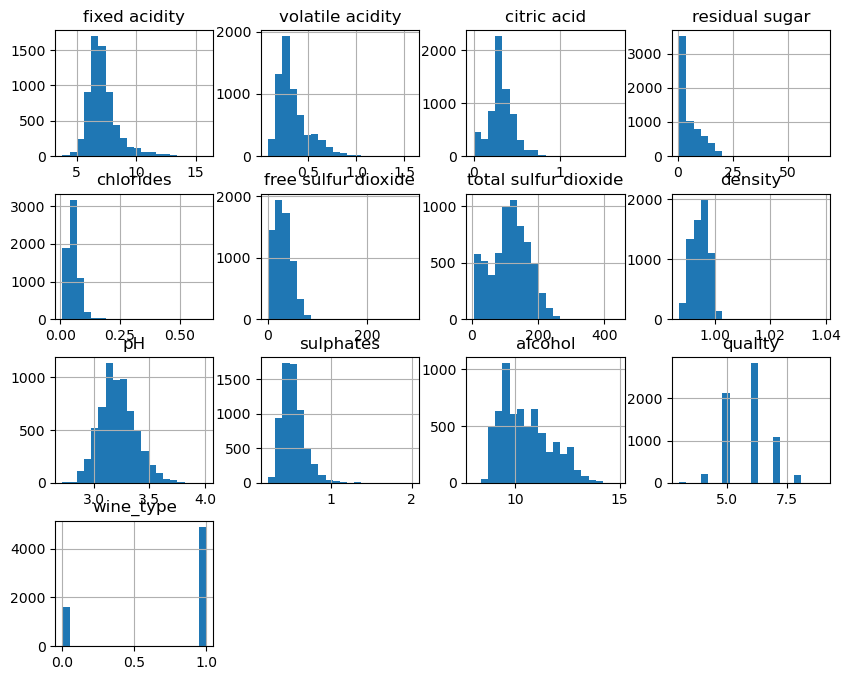

In [23]:
# Histograms
data.hist(figsize=(10,8), bins=20)
plt.show()

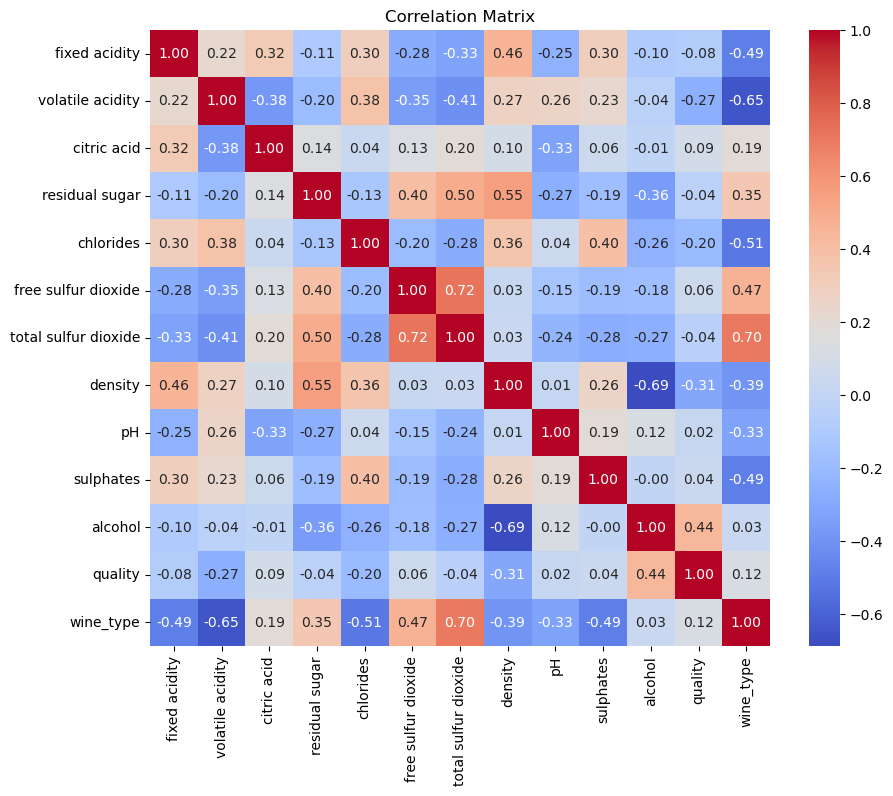

In [24]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

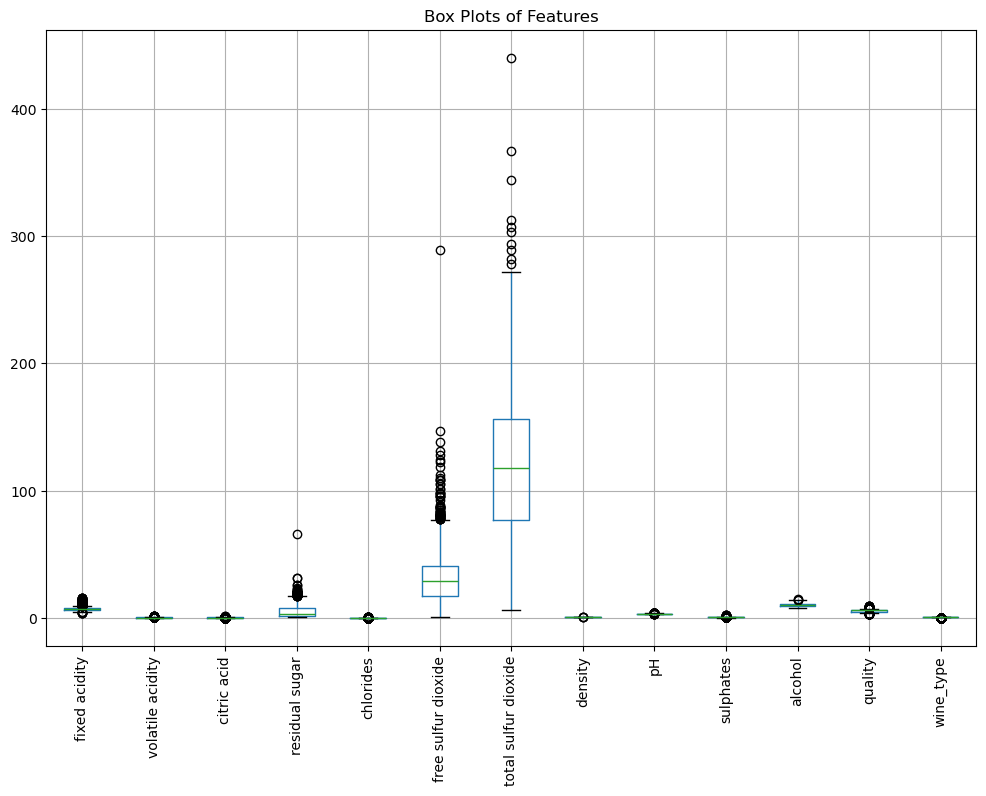

In [25]:
# Box Plots
plt.figure(figsize=(12,8))
data.boxplot(rot=90)
plt.title("Box Plots of Features")
plt.show()

# White Wine Normalization

In [47]:
X = white_wine.drop('quality', axis=1)
X = X.drop('wine_type', axis=1)

y = white_wine['quality']

In [48]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [49]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

## Range Scaling

In [ ]:
# Calcular estatísticas
means = np.array(X.mean())
mins = np.array(X.min())
maxs = np.array(X.max())  

X_range =  X

for index, row in X_range.iterrows():
    X_range.loc[index] = (row - means) / (maxs - mins)


In [66]:
X_range.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.013963,-0.008080,0.015547,0.219457,-0.002292,0.033770,0.073409,0.134425,-0.171151,-0.046334,-0.276495
1,-0.053345,0.021332,0.003499,-0.073488,0.009578,-0.074244,-0.014758,-0.000528,0.101576,0.000178,-0.163591
2,0.119732,0.001724,0.039644,0.007800,0.012545,-0.018495,-0.095964,0.020679,0.065212,-0.057961,-0.066817
3,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
4,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075


## Standardization

In [68]:
zscore_scaler = StandardScaler()
zscore_array = zscore_scaler.fit_transform(X)
X_zscore = pd.DataFrame(zscore_array, columns=X.columns)

In [69]:
X_zscore.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


# Fuzzy c-Means (FCM)

In [72]:
c_min, c_max = 3, 8
cost_values = []

# Iterate over different cluster numbers
for c in range(c_min, c_max):
    # Apply Fuzzy C-Means
    cntr, u, cost, _, _, _, _ = fuzz.cluster.cmeans(
        X_range, c, m=2, error=0.005, maxiter=1000, init=None
    )
    
    cost_values.append(cost[-1])  # Store the final cost

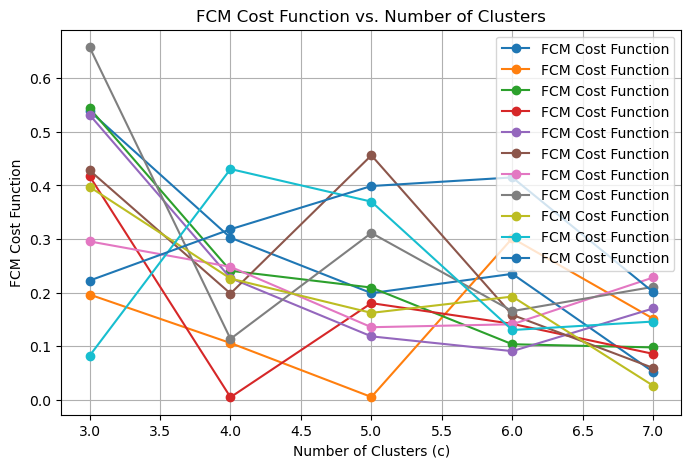

In [ ]:
# Plot cost function vs. number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(c_min, c_max), cost_values, marker='o', linestyle='-', label="FCM Cost Function")  # Adiciona label
plt.xlabel("Number of Clusters (c)")
plt.ylabel("FCM Cost Function")
plt.title("FCM Cost Function vs. Number of Clusters")
plt.grid()
plt.legend()
plt.show()


#fazer varias iteraçoes e ver qual o numero mais comum de clusters.